In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from datetime import datetime

In [44]:
def get_smoothed_data(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)
    df = pd.DataFrame(data)
    df["date"] = pd.to_datetime(df["date"])
    df = df.sort_values(by="date")

    x = df["date"].map(datetime.toordinal)
    y = df["average_sentiment"]

    x_smooth = np.linspace(x.min(), x.max(), 30)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)
    dates_smooth = [datetime.fromordinal(int(val)) for val in x_smooth]

    return df, dates_smooth, y_smooth

In [43]:
company_files = {
    "Facebook": "../../data/PostEDA/dummy_sentiment_data.json",
    # "Tesla": "../../data/PostEDA/tesla.json",
    # "Apple": "../../data/PostEDA/apple.json"
}


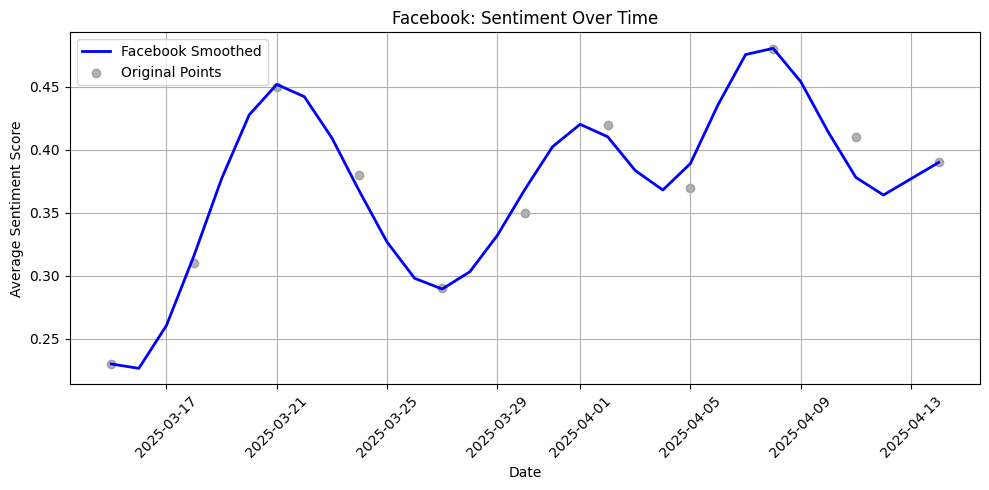

In [45]:
# Plot individual company graphs
for company, path in company_files.items():
    df, dates_smooth, y_smooth = get_smoothed_data(path)
    
    plt.figure(figsize=(10, 5))
    plt.plot(dates_smooth, y_smooth, label=f"{company} Smoothed", color="blue", linewidth=2)
    plt.scatter(df["date"], df["average_sentiment"], color="gray", alpha=0.6, label="Original Points")
    plt.title(f"{company}: Sentiment Over Time")
    plt.xlabel("Date")
    plt.ylabel("Average Sentiment Score")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()

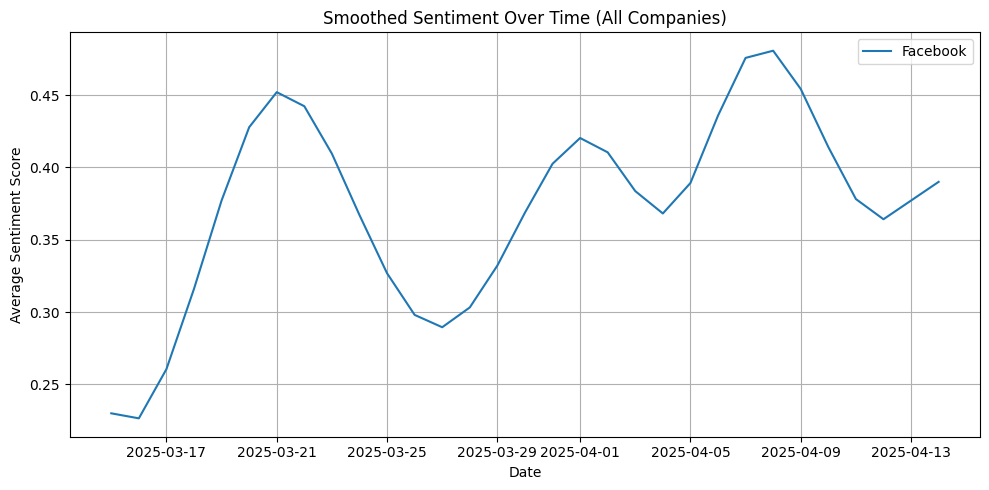

In [47]:
# Combined plot
plt.figure(figsize=(10, 5))
for company, path in company_files.items():
    _, dates_smooth, y_smooth = get_smoothed_data(path)
    plt.plot(dates_smooth, y_smooth, label=company)

plt.title("Smoothed Sentiment Over Time (All Companies)")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.grid(True)
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()